# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
dfmouse = pd.DataFrame(mouse_metadata)
dfstudy = pd.DataFrame(study_results)

df = pd.merge(dfstudy, dfmouse, on = "Mouse ID" )

# Display the data table for preview 
display(df)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice. .....  https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/
mouse_count = len(df["Mouse ID"].unique())
display(mouse_count)

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# subset is based on two columns - Mouse ID and Timepoint 
id_time_dupes = df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False) #finds the true false values of duplication and shows all rows that are dupes 
id_time_dupes

dupe_mice = df[id_time_dupes]["Mouse ID"].unique()#shows all unique mice ids that are duplicated in the dataframe
display(dupe_mice)

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset.html
df[df["Mouse ID"].isin(dupe_mice)] #the dupes returns an array so have to pull mouse ID from "isin" the array 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
#dfclean = df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep=False) for some reason keeps the mouse, so we fixing it by saying does not equal
dfclean = df[df["Mouse ID"] != "g989"]
display(dfclean)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = len(dfclean["Mouse ID"].unique())
display(mouse_count_clean)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
    ## requires groupby for TUMOR VOLUME and REGIMEN-- so have to groupby those
    ## SEM is standara error of the mean 

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = dfclean["Tumor Volume (mm3)"].groupby(dfclean["Drug Regimen"]).mean()
median = dfclean["Tumor Volume (mm3)"].groupby(dfclean["Drug Regimen"]).median()
variance = dfclean["Tumor Volume (mm3)"].groupby(dfclean["Drug Regimen"]).var()
stdev = dfclean["Tumor Volume (mm3)"].groupby(dfclean["Drug Regimen"]).std()
sterr = dfclean["Tumor Volume (mm3)"].groupby(dfclean["Drug Regimen"]).sem()

summary_stats = pd.concat([mean,
                          median,
                          variance, 
                          stdev,
                          sterr],
                          axis= 1)

summary_stats.columns = ["Mean Tumor Volume","Median Tumor Volume","Tumor Volume Variance", "Tumor Volume Std. Dev.","Tumor Volume Std. Err."]

display(summary_stats)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

#grouby Drug Regimen in the rows  and select the tumor volume column groupby is (rows:columns)
#remember to use [[]] to ensure that columns are a data frame in groupby 
summary_stats2 = dfclean.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
display(summary_stats2)# can also add "count" to the agg to show counts

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

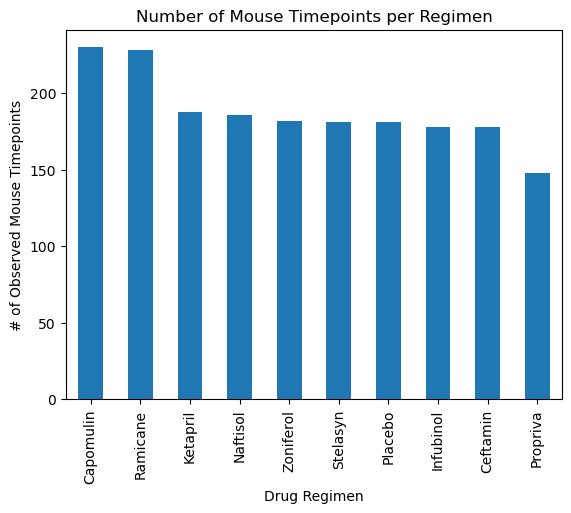

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar1 = dfclean["Drug Regimen"].value_counts()

#to check the values match what is expected and see if df or series
#display(bar1)

#plot the table with 
#Pandas https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.bar.html
#https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
bar1.plot.bar(x= "Drug Regimen", y= "# of Observed Mouse Timepoints" ) #figsize, color, edgecolor etc is available as well

#add labels
plt.title("Number of Mouse Timepoints per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

#Pandas uses show to display, it was missing labels, so have to add those above
plt.show()

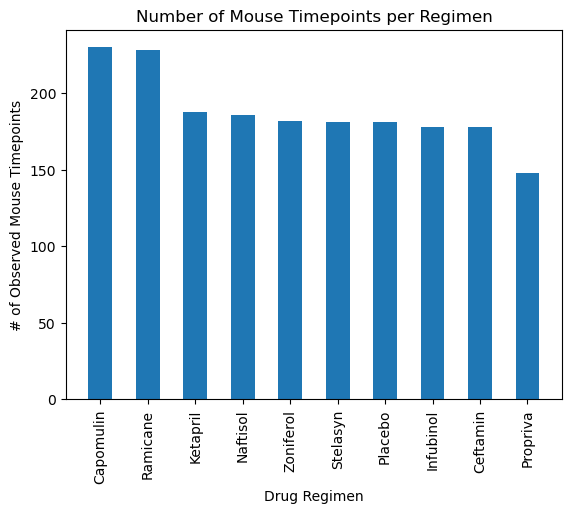

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar2 = dfclean["Drug Regimen"].value_counts()

#matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)[source]
#have to use index becaue the resulting series has the drug as the index
#note I can chnage the figsize in the pandas barplot as well... needs more review on sizing frames
plt.bar(bar2.index, bar2, width=.5)
#check data
# display(bar2)

plt.title("Number of Mouse Timepoints per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90, ha="center")

#display with show, labels are wacked... have to change their orientation above
plt.show()

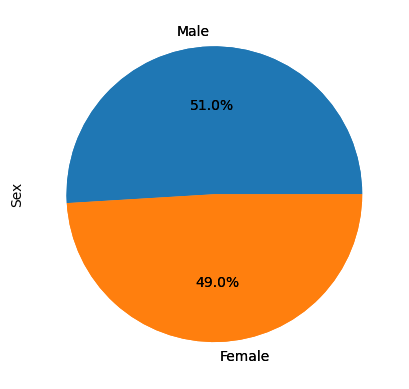

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_value = dfclean["Sex"].value_counts()

#Rename the "count" index to "Sex"
#sex_value.index.name = "Sex"

#display to understand what result should look like
#display(sex_value)

# # the index needs to be specified as the label and add datalabel
sex_value.plot.pie(labels=sex_value.index, autopct='%1.1f%%')

# # the index needs to be specified as the label and add datalabel
sex_value.plot.pie(autopct='%1.1f%%', ylabel="Sex")

plt.show()

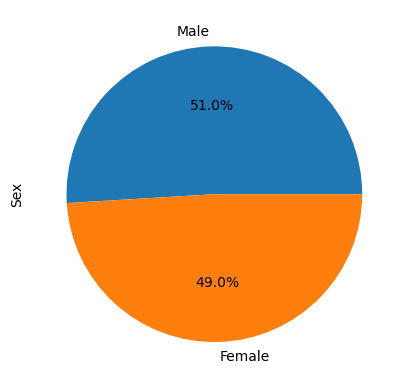

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_value = dfclean["Sex"].value_counts()

#tried to change the ylabel.. turns out it was really index i was looking for but it works... 
labels= ["Male","Female"]

plt.pie(sex_value, labels=labels, autopct='%1.1f%%')

#here's how to plot the ylabel
plt.ylabel("Sex")

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = dfclean.groupby(["Mouse ID"])["Timepoint"].max()

#check what we just made in max_time to see if it jives
#display(max_time)

#create a dataframe of max_time
dfmax_time = pd.DataFrame(max_time)

display(dfmax_time)

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [33]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

#merge on right to to keep only the max time
final_tumors = pd.merge( dfmax_time, dfclean, on=["Mouse ID","Timepoint"], how="left")

display(final_tumors)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"] #list of drugs to search for 

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = [] #starter volume data list to append to

dffiltered = final_tumors[final_tumors["Drug Regimen"].isin(treatments)]
dffiltered.reset_index(drop=True, inplace=True)
display(dffiltered)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
809,m601,25,33.118756,1,Capomulin,Male,22,17
810,m601,30,31.758275,1,Capomulin,Male,22,17
811,m601,35,30.834357,1,Capomulin,Male,22,17
812,m601,40,31.378045,1,Capomulin,Male,22,17


In [60]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_dict = {} #starter volume data dict to append to

#value_list = ['Tumor Volume ']

# Loop through each drug in the treatment list
for treatment in treatments:
    # Filter the list for rows corresponding to the current drug
    tumor4 = final_tumors[final_tumors["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]

    #find upper, lower, IQR, upper, lower, and outliers
    #Notes on IQR outliers -- #https://math.stackexchange.com/questions/4263553/can-the-1-5-be-changed-when-using-iqr-interquartile-range-method-to-calculate
    upper_q = np.percentile(tumor4, 75)
    lower_q = np.percentile(tumor4, 25)
    iqr = upper_q - lower_q
    upperbound = upper_q + (1.5 * iqr)
    lowerbound = lower_q - (1.5 * iqr)
    upper_outliers = (x for x in tumor4 if x > upperbound)
    lower_outliers = (x for x in tumor4 if x < lowerbound)

    #U and L outliers are coming up as generators instead so we convert to list: 
    upper_outliers = list(upper_outliers)
    lower_outliers =  list(lower_outliers)

    # Append the tumor volumes for the current drug to the list
    tumor_vol_dict[treatment] = {"Tumor Volume" : list(tumor4),
                                 "Upper Percentile": upper_q,
                                "Lower Percentile": lower_q,
                                "IQR": iqr,
                                "Upper Bound": upperbound,
                                "Lower Bound": lowerbound,
                                "Upper Outliers": [upper_outliers],
                                "Lower Outliers": [lower_outliers]}
#check for salience
# display(tumor_vol_dict)

#convert dictionary to dataframe https://www.geeksforgeeks.org/how-to-convert-dictionary-to-pandas-dataframe/
dfpromising = pd.DataFrame(tumor_vol_dict).T
dfpromising = dfpromising.reset_index().rename(columns={"index" : "Drug Regimen"})
display(dfpromising)

,Drug Regimen,Tumor Volume,Upper Percentile,Lower Percentile,IQR,Upper Bound,Lower Bound,Upper Outliers,Lower Outliers
0,Capomulin,"[38.98287774, 38.93963263, 30.48598484, 37.074...",40.15922,32.377357,7.781863,51.832015,20.704562,[[]],[[]]
1,Ramicane,"[38.4076183, 43.0475426, 38.81036633, 32.97852...",40.659006,31.56047,9.098537,54.306811,17.912664,[[]],[[]]
2,Infubinol,"[67.97341878, 65.52574285, 57.03186187, 66.083...",65.525743,54.048608,11.477135,82.741446,36.832905,[[]],[[36.3213458]]
3,Ceftamin,"[62.99935619, 45.0, 56.05774909, 55.74282869, ...",64.29983,48.722078,15.577752,87.666458,25.35545,[[]],[[]]


<Figure size 1000x600 with 0 Axes>

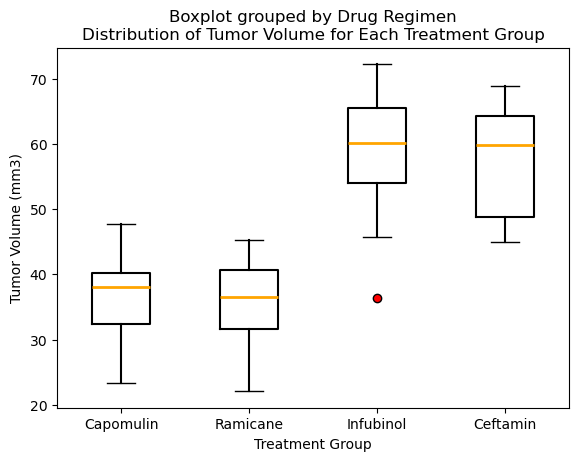

In [91]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Create an empty list to store individual tumor volume measurements
data_individual = []

# Iterate over each row in dfpromising # itterrows from Kevin K
for index, row in dfpromising.iterrows():
    # Extract the drug regimen and tumor volume list
    drug_regimen = index
    tumor_volume_list = row["Tumor Volume"]
    
    # Iterate over each tumor volume measurement in the list
    for tumor_volume in tumor_volume_list:
        # Append the drug regimen and tumor volume measurement to data_individual
        data_individual.append({"Drug Regimen": drug_regimen, "Tumor Volume": tumor_volume})

# Convert the list of dictionaries to a DataFrame
df_individual = pd.DataFrame(data_individual)

# Generate box plot
plt.figure(figsize=(10, 6))
df_individual.boxplot(column="Tumor Volume", 
                      by="Drug Regimen",
                      # patch_artist=True, 
                        boxprops=dict(linewidth=1.5),
                        whiskerprops=dict(color='black', linewidth=1.5),
                        medianprops=dict(color='orange', linewidth=2),
                        flierprops=dict(marker='o',  markerfacecolor='red', markeredgecolor='black', alpha=1))

plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Treatment Group')
plt.xticks(ticks=[1,2,3,4],labels=treatments)
plt.grid(False)
plt.show()

## Line and Scatter Plots

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
